# Joint Online Faculty Development programme on Deep Learning (Parallel Architecture) Aug 23 – Sep 3 , 2021



# Tutorial 3: Neural Network Classification

Dataset: [Pima Indian Diabetes Dataset](https://data.world/data-society/pima-indians-diabetes-database#)

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Attributes of PIMA dataset:

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: Class variable (0 or 1)

**1. Mount the Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**2. Move to the place where data resides**

In [16]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [10]:
!ls

'accenture virtual internship.pdf'
'Colab Notebooks'
 copy.docx
'Copy of Copy of images.ipynb'
'Data analytics unit test .pdf'
'DocScanner 17-Nov-2021 5.08 pm.pdf'
'Document from Himanshu goyal'
'Document from Himanshu Goyal'
'Document from Himanshu Goyal (1).pdf'
'Document from Himanshu goyal.pdf'
'Document from Himanshu Goyal.pdf'
'Getting started.pdf'
'Himanshu goyal (0827CO191024) .gdoc'
'Himanshu Goyalproject.pdf'
 IMG-20191204-WA0002.jpg
 Invoice_16120485434-3.pdf
'K385C98AdmitCard.pdf gate exam.pdf'
'Lab analysis cyber security'
 petrol_consumption.csv
 photo.jpg
'Related work -1.docx'
 Screenshot_2021-05-29-11-58-19-382_com.google.android.youtube.jpg
 Screenshot_2021-05-29-13-52-09-117_com.google.android.youtube.jpg
 TOC_Practical_assessment_format.docx
'Toc practical.pdf'
'unit test dbms .pdf'
'Untitled form (1).gform'
'Untitled form (2).gform'
'Untitled form.gform'
'Untitled spreadsheet (1).gsheet'
'Untitled spreadsheet.gsheet'


**3. Read the dataset from CSV file**

In [23]:
import pandas as pd
data = pd.read_csv('/content/diabetes.csv')
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [24]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
data.values

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

**4. Store the data into input feature and label variables**

In [26]:
dataset= data.values
X = dataset[:,0:8]
Y = dataset[:,8]
print(X)
print(Y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 

**5. Data Normalization**

In [27]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

**6. One-hot vector conversion**

In [28]:
from keras.utils import np_utils
encoded_y = np_utils.to_categorical(Y)
encoded_y

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

**7. Split the dataset into training, testing and validation set**

In [29]:
from sklearn.model_selection import train_test_split
X_training, X_testing, Y_training, Y_testing = train_test_split(X_scale, encoded_y, test_size=0.2, random_state=10)
X_training, X_valid, Y_training, Y_valid = train_test_split(X_training, Y_training, test_size=0.25, random_state=10)
print(len(X_training))
print(len(X_testing))
print(len(X_valid))

460
154
154


**8. Model Creation**

In [30]:
from keras.models import Sequential
from keras.layers import Dense

# Creating the model
model = Sequential()
model.add(Dense(12, input_shape=(8,), activation='tanh'))
model.add(Dense(8, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.summary()   #gives a summary of the model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 230
Trainable params: 230
Non-trainable params: 0
_________________________________________________________________


**9. Model Compile**

In [31]:
from tensorflow.keras import optimizers
opt=optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

**10. Model Training**

if you have 1000 training examples, and your batch size is  500, then it will take 2 iterations to complete 1 epoch.

In [35]:
hist = model.fit(X_training, Y_training,batch_size=16,  epochs=200, validation_data=(X_valid,Y_valid))

Epoch 1/200
29/29 [==============================] - 0s 6ms/step - loss: 0.5965 - accuracy: 0.6761 - val_loss: 0.6447 - val_accuracy: 0.6104
Epoch 2/200
29/29 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.6761 - val_loss: 0.6434 - val_accuracy: 0.6104
Epoch 3/200
29/29 [==============================] - 0s 5ms/step - loss: 0.5935 - accuracy: 0.6761 - val_loss: 0.6439 - val_accuracy: 0.6104
Epoch 4/200
29/29 [==============================] - 0s 5ms/step - loss: 0.5920 - accuracy: 0.6761 - val_loss: 0.6423 - val_accuracy: 0.6104
Epoch 5/200
29/29 [==============================] - 0s 4ms/step - loss: 0.5906 - accuracy: 0.6761 - val_loss: 0.6408 - val_accuracy: 0.6104
Epoch 6/200
29/29 [==============================] - 0s 4ms/step - loss: 0.5899 - accuracy: 0.6761 - val_loss: 0.6389 - val_accuracy: 0.6104
Epoch 7/200
29/29 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.6761 - val_loss: 0.6393 - val_accuracy: 0.6104
Epoch 8/200
2

**11. Plot the training loss and accuracy**

<Figure size 432x288 with 0 Axes>

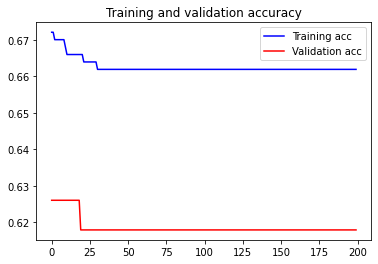

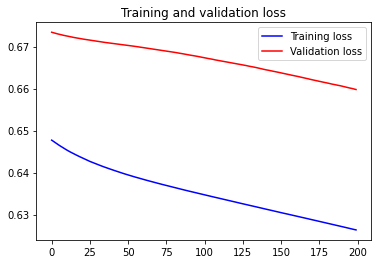

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt 
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('custom_trainvalacc.png')
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
#plt.show()
plt.savefig('custom_trainvalloss.png')
plt.figure()

**12. Evaluate the performance**

In [ ]:
res =model.evaluate(X_testing, Y_testing)

5/5 [==============================] - 0s 3ms/step - loss: 0.5638 - accuracy: 0.6623


**13. Predict on new datatset**


In [ ]:
test=X_testing[0]
y_act=Y_testing[0]
result=model.predict(test.reshape(1,8))
result

array([[0.45582914, 0.54417086]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.round(result)
print("Actual:"+ str(y_act))
print("Predicted:"+str(y_pred))

Actual:[1. 0.]
Predicted:[[0. 1.]]


**Reference:** - https://keras.io/